In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import HR_config.wrapper as sweHR
import swe.animation_SWE
from IPython.display import HTML
import numpy as np

# Animation of SSH -------------------------------------------

[xr, h, u, t] = sweHR.swe_KAP(sweHR.Kref * 2, sweHR.amplitude - 1.0, sweHR.period + 1.0)


Computation of href performed w/ following parameters:
- Hauteur eau moyenne =  20
- Amplitude =  5.0
- Periode =  15.0
- Phase =  0


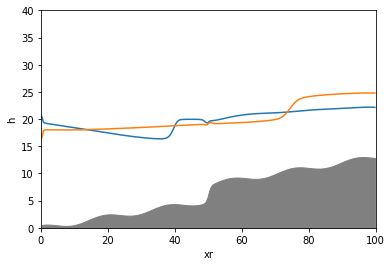

In [2]:
anim = swe.animation_SWE.animate_SWE(xr, [sweHR.href, h], sweHR.b, sweHR.D, ylim=[0, 40])
HTML(anim.to_html5_video())

In [3]:
# Adjoint gradient
J, grad = sweHR.J_KAP(sweHR.Kref, sweHR.amplitude, sweHR.period)
print(f"{J=}")
print(f"{all(grad==0.0)=}")


J=0.0
all(grad==0.0)=True


In [4]:
cost0, gradient0 = sweHR.J_KAP([0], sweHR.amplitude, sweHR.period)
epsilon = 1e-8
cost_eps = sweHR.J_KAP_nograd([epsilon], sweHR.amplitude, sweHR.period)
gradient_finite_diff = (cost_eps - cost0) / epsilon
print(f"Gradient (finite difference): {gradient_finite_diff: >+10.12f}")
print(f"Gradient (adjoint) : {gradient0[0]: >+10.12f}")
print(f"{np.isclose(gradient_finite_diff, gradient0[0])=}")

response, gradient = sweHR.J_KAP_array(
    [
        ([0.1, 0.2, 0.5], 5.0, 15.0),  # Example array to evaluate
        ([0.1, 0.2, 0.5], 5.1, 15.1),  # Dim K = 3
        ([0.1, 0.1, 0.1], 5.0, 15.2),
        ([0.1, 0.1, 0.4], 5.1, 15.0),
        ([0.2, 0.2, 0.5], 5.0, 15.1),
        # ([0.2, 0.2, 0.5], 5.1, 15.2),
        # ([0.6, 0.1, 0.7], 5.0, 15.0),
        # ([0.2, 0.2, 0.5], 5.1, 15.1),
        # ([0.2, 0.2, 0.5], 5.0, 15.2),
        # ([0.1, 0.7, 0.5], 5.1, 15.0),
        # ([0.2, 0.2, 0.2], 5.0, 15.1),
    ],
    idx_to_observe=None,
    hreference=sweHR.href,
    parallel=False,
    ncores=4,
    adj_gradient=True,
)


Gradient (finite difference): -89972.329806187190
Gradient (adjoint) : -89972.339136255512
np.isclose(gradient_finite_diff, gradient0[0])=True


/mnt/c/Users/a846735/SWE1D/.venvSWE1D/lib/python3.8/site-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


Time elapsed for unparallelized computations 21.099235773086548
Time elapsed for unparallelized computations 41.75823378562927
Time elapsed for unparallelized computations 63.46360540390015
Time elapsed for unparallelized computations 86.85250186920166
Time elapsed for unparallelized computations 108.67194867134094


In [5]:
response, gradient

(array([12511.797565  , 25194.90679691, 74222.15306137,  6916.83765438,
        25450.61858666]),
 array([[  1993.33595069,  23803.56145365,  37933.50664079],
        [ -1928.36657716,  -4541.01293108,  29461.64512318],
        [ -8457.97609798, -73206.07020167, -51460.17811335],
        [  -225.5210434 ,   8965.20381258,  30164.1197909 ],
        [  -714.42876497,    617.19082194,  31539.10728469]]))